In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from DesignMetrics import df_permutation_test  # significance_columns
from Query.PDB import get_pdb_info_by_entity
from Query.UniProt import is_uniprot_thermophilic

In [161]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
mean = 'mean'
std = 'std'
idx_slice = pd.IndexSlice

For analysis of Nanohedra metrics for Bale 2016 and King 2014

In [4]:
df = pd.read_csv('/home/kylemeador/designs/2_ComponentDesignPoseMetrics(NO_T32).csv', index_col=[0], header=[0,1,2])

For analysis of meador2022 cages

In [168]:
meador_df = pd.read_csv('/home/kylemeador/Downloads/T33 Characterization Master Document - Metrics Only.csv', index_col=[0], header=[0])

## Recalculated metrics from performing refine on all completed designs

In [458]:
meador_new_df = pd.read_csv('/home/kylemeador/Downloads/22-04-26-102238-HBNetDesignProfileDesigns_DesignsPoseMetrics.csv', index_col=[0], header=[0,1,2])

In [459]:
meador_new_df.describe()

pose                            \
                  dock                             
      design_dimension entity_1_c_terminal_helix   
count             48.0                 48.000000   
mean               0.0                  0.437500   
std                0.0                  0.501328   
min                0.0                  0.000000   
25%                0.0                  0.000000   
50%                0.0                  0.000000   
75%                0.0                  1.000000   
max                0.0                  1.000000   

                                                                               \
                                                                                
      entity_1_c_terminal_orientation entity_1_max_radius entity_1_min_radius   
count                       48.000000           48.000000           48.000000   
mean                         0.125000           72.707175           22.052285   
std                          1.002656           15.924855            9.925039   
min                         -1.000000           43.457694            6.697790   
25%                         -1.000000           62.717916           13.979740   
50%                          1.000000           70.202133           20.182596   
75%                          1.000000           82.193073           27.521383   
max                          1.000000          110.349573           44.270539   

                                                                 \
                                                                  
      entity_1_n_terminal_helix entity_1_n_terminal_orientation   
count                 48.000000                       48.000000   
mean                   0.270833                        0.750000   
std                    0.449093                        0.668437   
min                    0.000000                       -1.000000   
25%                    0.000000                        1.000000   
50%                    0.000000                        1.000000   
75%                    1.000000                        1.000000   
max                    1.000000                        1.000000   

                                                                        \
                                                                         
      entity_1_number_of_residues entity_1_radius entity_1_thermophile   
count                   48.000000       48.000000            48.000000   
mean                   187.645833       49.900869             0.062500   
std                     78.276512       12.440541             0.244623   
min                     33.000000       29.514226             0.000000   
25%                    121.000000       41.214190             0.000000   
50%                    213.500000       47.563710             0.000000   
75%                    249.000000       55.731131             0.000000   
max                    381.000000       78.057743             1.000000   

                                                                 \
                                                                  
      entity_2_c_terminal_helix entity_2_c_terminal_orientation   
count                 48.000000                       48.000000   
mean                   0.500000                        0.250000   
std                    0.505291                        0.978492   
min                    0.000000                       -1.000000   
25%                    0.000000                       -1.000000   
50%                    0.500000                        1.000000   
75%                    1.000000                        1.000000   
max                    1.000000                        1.000000   

                                                                         \
                                                                          
      entity_2_max_radius entity_2_min_radius entity_2_n_terminal_helix   
count           48.000000           4

In [408]:
meador_df.describe()

,selection_weight,buried_unsatisfied_hbond_density,buried_unsatisfied_hbonds,contact_count,contact_order_collapse_z_sum,core,design_dimension,energy_distance_from_no_constraint_mean,entity_1_c_terminal_helix,entity_1_c_terminal_orientation,entity_1_max_radius,entity_1_min_radius,entity_1_n_terminal_helix,entity_1_n_terminal_orientation,entity_1_number_of_residues,entity_1_radius,entity_2_c_terminal_helix,entity_2_c_terminal_orientation,entity_2_max_radius,entity_2_min_radius,entity_2_n_terminal_helix,entity_2_n_terminal_orientation,entity_2_number_of_residues,entity_2_radius,entity_max_radius_average_deviation,entity_max_radius_ratio_1v2,entity_maximum_radius,entity_min_radius_average_deviation,entity_min_radius_ratio_1v2,entity_minimum_radius,entity_number_of_residues_average_deviation,entity_number_of_residues_ratio_1v2,entity_radius_average_deviation,entity_radius_ratio_1v2,entity_residue_length_total,errat_accuracy,errat_deviation,favor_residue_energy,global_collapse_z_sum,hydrophobicity_deviation_magnitude,initial_shape_complementarity,interaction_energy_complex,interaction_energy_per_residue,interface_area_hydrophobic,interface_area_polar,interface_area_to_residue_surface_ratio,interface_area_total,interface_b_factor_per_residue,interface_bound_activation_energy,interface_composition_similarity,interface_connectivity,interface_connectivity_1,interface_connectivity_2,interface_energy,interface_energy_bound,interface_energy_complex,interface_energy_density,interface_energy_unbound,interface_local_density,interface_secondary_structure_count,interface_secondary_structure_fragment_count,interface_separation,multiple_fragment_ratio,nanohedra_score,nanohedra_score_center,nanohedra_score_center_normalized,nanohedra_score_normalized,new_collapse_island_significance,new_collapse_islands,number_fragment_residues_center,number_fragment_residues_total,number_hbonds,number_of_fragments,number_of_mutations,percent_mutations,observations,observed_design,observed_evolution,observed_fragment,percent_core,percent_fragment,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_interface_area_hydrophobic,percent_interface_area_polar,percent_residues_fragment_center,percent_residues_fragment_total,percent_rim,percent_support,rim,rmsd_complex,rosetta_reference_energy,sequential_collapse_peaks_z_sum,sequential_collapse_z_sum,shape_complementarity,solvation_energy,solvation_energy_activation,solvation_energy_bound,solvation_energy_complex,solvation_energy_unbound,support,total_interface_residues,total_non_fragment_interface_residues,entity_1_number_of_mutations,entity_1_percent_mutations,entity_2_number_of_mutations,entity_2_percent_mutations,entity_thermophilicity,entity_1_thermophile,entity_2_thermophile
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.0,46.000000,39.000000,30.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.0,46.0,46.0,46.000000,46.000000,46.000000
mean,0.470330,0.001369,2.021739,3.736185,61.596293,15.413043,0.0,13.821536,0.456522,0.086957,72.252560,21.469445,0.282609,0.739130,184.978261,49.357640,0.478261,0.26

In [150]:
king_bale_df = pd.read_csv('/home/kylemeador/Downloads/22-04-20-205149-22-04-18-200135_refine_22-04-18-183844_generate_fragments_I32_pose_posePoseMetrics.csv', index_col=[0], header=[0,1,2])

In [163]:
design_thermophiles = {}
for design_idx, (entity_1_name, entity_2_name) in zip(meador_df.index.to_list(), meador_df.loc[:, ['entity_1_name', 'entity_2_name']].values):
    entity1_uniprot_id, entity2_uniprot_id = None, None
    design_thermophiles[design_idx] = {}
    api_entry1 = get_pdb_info_by_entity(entity_1_name)  # {chain: {'accession': 'Q96DC8', 'db': 'UNP'}, ...}
    if not api_entry1:
        print('Missing PDB 1 API')
    for chain, api_data in api_entry1.items():
        if api_data.get('db') == 'UNP':
            # set the first found chain. They are likely all the same anyway
            entity1_uniprot_id = api_data.get('accession')
#             print(entity_1_name, entity1_uniprot_id)
            break
        else:
            print('Found API DATA 1', entity_1_name, api_data.get('db'))
    design_thermophiles[design_idx]['entity_1_thermophile'] = is_uniprot_thermophilic(entity1_uniprot_id)

    api_entry2 = get_pdb_info_by_entity(entity_2_name)  # {chain: {'accession': 'Q96DC8', 'db': 'UNP'}, ...}
    if not api_entry2:
        print('Missing PDB 2 API')
    for chain, api_data in api_entry2.items():
        if api_data.get('db') == 'UNP':
            entity2_uniprot_id = api_data.get('accession')
#             print(entity_2_name, entity2_uniprot_id)
            break
        else:
            print('Found API DATA 2', entity_2_name, api_data.get('db'))
    design_thermophiles[design_idx]['entity_2_thermophile'] = is_uniprot_thermophilic(entity2_uniprot_id)

design_thermophile_df = pd.DataFrame(design_thermophiles).T

In [297]:
king_and_bale_map = '/home/kylemeador/Downloads/all_two_component_designs_name_entryID2_entryID1_sym2_sym1_result.csv'
with open(king_and_bale_map, 'r') as f:
    king_and_bale_map_dict = {}
    for line in f.readlines():
        name, entity2, entity1, sym2, sym1, result = line.strip().split(',')
        king_and_bale_map_dict['%s%s%s_Designs-%s' % (result, sym1[-1], sym2[-1], name.rstrip('.pdb'))] = {'entity_1_name': entity1.lower(), 'entity_2_name': entity2.lower()}

king_and_bale_map_dict['T33_Designs-T33-51'] = {'entity_1_name': '1wy1', 'entity_2_name': '1nog'}
king_and_bale_map_dict['T33_Designs-T33-53'] = {'entity_1_name': '1wy1', 'entity_2_name': '1nog'}

In [292]:
king_and_bale_map_dict

{'I32_Designs-I32-01': {'entity_1_name': '1hfo', 'entity_2_name': '3fgy'},
 'I32_Designs-I32-02': {'entity_1_name': '1iv2', 'entity_2_name': '3q20'},
 'I32_Designs-I32-03': {'entity_1_name': '1l1s', 'entity_2_name': '3irv'},
 'I32_Designs-I32-04': {'entity_1_name': '1l1s', 'entity_2_name': '3l34'},
 'I32_Designs-I32-05': {'entity_1_name': '1l1s', 'entity_2_name': '3t1s'},
 'I32_Designs-I32-07': {'entity_1_name': '1nq3', 'entity_2_name': '3gfa'},
 'I32_Designs-I32-08': {'entity_1_name': '1o5j', 'entity_2_name': '3h2d'},
 'I32_Designs-I32-11': {'entity_1_name': '1u9d', 'entity_2_name': '3noq'},
 'I32_Designs-I32-12': {'entity_1_name': '1v3w', 'entity_2_name': '2gax'},
 'I32_Designs-I32-13': {'entity_1_name': '1wa3', 'entity_2_name': '3g8z'},
 'I32_Designs-I32-14': {'entity_1_name': '1wa3', 'entity_2_name': '3mtq'},
 'I32_Designs-I32-15': {'entity_1_name': '1woz', 'entity_2_name': '2f22'},
 'I32_Designs-I32-16': {'entity_1_name': '1woz', 'entity_2_name': '2pey'},
 'I32_Designs-I32-17': {'

In [298]:
king_bale_map_df = pd.DataFrame(king_and_bale_map_dict).T

In [299]:
king_bale_df.update(king_bale_map_df)

In [392]:
king_bale_df.describe()

,design_dimension,entity_1_c_terminal_helix,entity_1_c_terminal_orientation,entity_1_max_radius,entity_1_min_radius,entity_1_n_terminal_helix,entity_1_n_terminal_orientation,entity_1_number_of_residues,entity_1_radius,entity_1_thermophile,entity_2_c_terminal_helix,entity_2_c_terminal_orientation,entity_2_max_radius,entity_2_min_radius,entity_2_n_terminal_helix,entity_2_n_terminal_orientation,entity_2_number_of_residues,entity_2_radius,entity_2_thermophile,entity_max_radius_average_deviation,entity_max_radius_ratio_1v2,entity_maximum_radius,entity_min_radius_average_deviation,entity_min_radius_ratio_1v2,entity_minimum_radius,entity_number_of_residues_average_deviation,entity_number_of_residues_ratio_1v2,entity_radius_average_deviation,entity_radius_ratio_1v2,entity_residue_length_total,entity_thermophilicity,interface_b_factor_per_residue,interface_secondary_structure_count,interface_secondary_structure_fragment_count,multiple_fragment_ratio,nanohedra_score,nanohedra_score_center,nanohedra_score_center_normalized,nanohedra_score_normalized,number_fragment_residues_center,number_fragment_residues_total,number_of_fragments,observations,percent_fragment,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_residues_fragment_center,percent_residues_fragment_total,total_interface_residues,total_non_fragment_interface_residues,buried_unsatisfied_hbond_density,buried_unsatisfied_hbonds,contact_count,core,entity_1_number_of_mutations,entity_1_percent_mutations,entity_2_number_of_mutations,entity_2_percent_mutations,errat_accuracy,favor_residue_energy,interaction_energy_complex,interaction_energy_per_residue,interface_area_hydrophobic,interface_area_polar,interface_area_to_residue_surface_ratio,interface_area_total,interface_bound_activation_energy,interface_composition_similarity,interface_connectivity,interface_connectivity_1,interface_connectivity_2,interface_energy,interface_energy_bound,interface_energy_complex,interface_energy_density,interface_energy_unbound,interface_local_density,interface_separation,number_hbonds,number_of_mutations,percent_core,percent_interface_area_hydrophobic,percent_interface_area_polar,percent_mutations,percent_rim,percent_support,rim,rmsd_complex,rosetta_reference_energy,shape_complementarity,solvation_energy,solvation_energy_activation,solvation_energy_bound,solvation_energy_complex,solvation_energy_unbound,support
count,266.0,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.0,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.0,266.0,266.0,266.0,266.000000,266.0,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.0,266.000000,266.000000,266.000000,266.0,266.000000,266.000000,266.000000,2.660000e+02,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,0.0,0.578947,0.127820,120.049706,73.620491,0.281955,0.172932,155.951128,97.046016,0.150376,0.556391,0.233083,121.582571,79.119649,0.402256,0.338346,156.244361,100.731766,0.184211,0.106444,0.996679,126.748926,0.205219,0.953486,70.315155,0.347871,1.078949,0.127215,0.973555,312.195489,0.167293,0.894774,10.842105,2.639098,2.000099,18.002035,3.901928,0.398045,0.603801,8.154135,25.571429,10.541353,1.0,0.736447,0.034496,0.853791,0.025247,0.235325,0.679977,36.939850,28.785714,0.002026,1.710526,3.395493,10.109023,0.0,0.0,0.0,0.0,95.063687,0.0,-35.715733,-0.976344

In [397]:
king_bale_df.loc['I53_Designs-I53-50', ['interface_area_total', 'interface_area_hydrophobic', 'interface_area_polar']]

interface_area_total          604.083052
interface_area_hydrophobic    493.811792
interface_area_polar           110.27126
Name: I53_Designs-I53-50, dtype: object

### Using PyMol I found a value of 1220.6370000000024

In [398]:
king_bale_df.loc['I32_Designs-I32-02', ['interface_area_total', 'interface_area_hydrophobic', 'interface_area_polar']]

interface_area_total          743.605975
interface_area_hydrophobic    686.099897
interface_area_polar           57.506078
Name: I32_Designs-I32-02, dtype: object

### Using PyMol I found a value of 1451.0750000000007

In [415]:
king_bale_df.loc[['T33_Designs-T33-51', 'T33_Designs-T33-53'], ['interface_area_total', 'interface_area_hydrophobic', 'interface_area_polar']]

,interface_area_total,interface_area_hydrophobic,interface_area_polar
T33_Designs-T33-51,563.809408,400.777039,163.032369
T33_Designs-T33-53,623.830723,451.148622,172.682100


In [ ]:
Loooking at my designs calculated after a refine protocol

In [460]:
meador_new_df.loc['HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4k3w_4mi2-DEGEN_1_1-ROT_11_7-tx_172_design_4k3w_4mi2-DEGEN_1_1-ROT_11_7-tx_172_clean_asu_scout_hbnet_design_profile_0043_0001', [('pose', 'mean', 'interface_area_total'), ('pose', 'mean', 'interface_area_hydrophobic'), ('pose', 'mean', 'interface_area_polar')]]

pose  mean  interface_area_total          835.941572
            interface_area_hydrophobic    460.440383
            interface_area_polar          375.501189
Name: HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4k3w_4mi2-DEGEN_1_1-ROT_11_7-tx_172_design_4k3w_4mi2-DEGEN_1_1-ROT_11_7-tx_172_clean_asu_scout_hbnet_design_profile_0043_0001, dtype: float64

### Using PyMol I found a value of 1542.8669999999984

## Comparison of PyMol get_area and Rosetta per_residue summary metrics
It appears PyMol is consistently 2x bigger in the calculation. Perhaps it is wrong and rosetta is right? It seems freesasa is a good complement to both of these to see which is more accurate. I think that Rosetta as I have set it up is incorrect because we I compare the values for T33-51 and T33-53 I get values much closer to the 2x value produced by get_area with PyMol

## HAVE TO MOVE BELOW REFINE AND DOCK SELECTION AND DUPLICATION

In [302]:
kb_design_thermophiles = {}
for design_idx, (entity_1_name, entity_2_name) in zip(king_bale_df.index.to_list(), king_bale_df.loc[:, ['entity_1_name', 'entity_2_name']].values):
    entity1_uniprot_id, entity2_uniprot_id = None, None
    kb_design_thermophiles[design_idx] = {}
    api_entry1 = get_pdb_info_by_entity('%s_1' % entity_1_name if len(entity_1_name.split('_')) == 1 else entity_1_name)  # {chain: {'accession': 'Q96DC8', 'db': 'UNP'}, ...}
    if not api_entry1:
        print('Missing PDB 1 API')
    for chain, api_data in api_entry1.items():
        if api_data.get('db') == 'UNP':
            # set the first found chain. They are likely all the same anyway
            entity1_uniprot_id = api_data.get('accession')
#             print(entity_1_name, entity1_uniprot_id)
            break
        else:
            print('Found API DATA 1', entity_1_name, api_data.get('db'))
    kb_design_thermophiles[design_idx]['entity_1_thermophile'] = is_uniprot_thermophilic(entity1_uniprot_id)

    api_entry2 = get_pdb_info_by_entity('%s_1' % entity_2_name if len(entity_2_name.split('_')) == 1 else entity_2_name)  # {chain: {'accession': 'Q96DC8', 'db': 'UNP'}, ...}
    if not api_entry2:
        print('Missing PDB 2 API')
    for chain, api_data in api_entry2.items():
        if api_data.get('db') == 'UNP':
            entity2_uniprot_id = api_data.get('accession')
#             print(entity_2_name, entity2_uniprot_id)
            break
        else:
            print('Found API DATA 2', entity_2_name, api_data.get('db'))
    kb_design_thermophiles[design_idx]['entity_2_thermophile'] = is_uniprot_thermophilic(entity2_uniprot_id)

kb_design_thermophile_df = pd.DataFrame(kb_design_thermophiles).T

In [305]:
kb_is_thermophilic = []
for idx, entity_idx_thermophile in enumerate(kb_design_thermophile_df.columns.to_list(), 1):
#     for design_idx, design in enumerate():
    kb_is_thermophilic.append([kb_design_thermophile_df.loc[design, entity_idx_thermophile] 
                               for design in kb_design_thermophile_df.index.to_list()])
king_bale_df['entity_thermophilicity'] = [sum(pair) / idx for pair in zip(*kb_is_thermophilic)]  # get the average

In [395]:
kb_design_thermophile_df

,entity_1_thermophile,entity_2_thermophile
I32_Designs-I32-01,0,0
I32_Designs-I32-02,0,1
I32_Designs-I32-03,1,0
I32_Designs-I32-04,1,0
I32_Designs-I32-05,1,0
...,...,...
T33_Designs-T33-28,0,0
T33_Designs-T33-29,0,0
T33_Designs-T33-30,0,0
T33_Designs-T33-51,1,1


In [307]:
king_bale_df.update(kb_design_thermophile_df)

In [306]:
king_bale_df['entity_thermophilicity']

I32_Designs-I32-01    0.0
I32_Designs-I32-02    0.5
I32_Designs-I32-03    0.5
I32_Designs-I32-04    0.5
I32_Designs-I32-05    0.5
                     ... 
T33_Designs-T33-28    0.0
T33_Designs-T33-29    0.0
T33_Designs-T33-30    0.0
T33_Designs-T33-51    1.0
T33_Designs-T33-53    1.0
Name: entity_thermophilicity, Length: 266, dtype: float64

In [169]:
is_thermophilic = []
for idx, entity_idx_thermophile in enumerate(design_thermophile_df.columns.to_list(), 1):
#     for design_idx, design in enumerate():
    is_thermophilic.append([design_thermophile_df.loc[design, entity_idx_thermophile] 
                            for design in design_thermophile_df.index.to_list()])
        
    meador_df['entity_%d_number_of_mutations' % idx] = 0
    meador_df['entity_%d_percent_mutations' % idx] = 0

meador_df['entity_thermophilicity'] = [sum(pair) / idx for pair in zip(*is_thermophilic)]  # get the average

In [194]:
meador_df = pd.concat([meador_df, design_thermophile_df], axis=1)

In [170]:
meador_df['entity_thermophilicity']

Expression Plate ID
E1     0.0
E10    0.0
E11    0.0
E12    0.5
E2     0.0
E3     0.0
E4     0.0
E5     0.0
E6     0.0
E7     0.0
E8     0.0
E9     0.0
F1     0.0
F10    0.5
F11    0.0
F12    0.0
F2     0.0
F3     0.5
F4     0.0
F5     0.0
F6     0.0
F7     0.0
F8     0.0
F9     0.5
G1     0.5
G10    0.0
G11    0.0
G12    0.0
G2     0.0
G3     0.0
G4     0.0
G5     0.0
G6     0.0
G7     0.0
G8     0.5
G9     0.0
H1     0.0
H10    0.0
H2     0.0
H3     0.0
H4     0.0
H5     0.0
H6     0.0
H7     0.0
H8     0.0
H9     0.0
Name: entity_thermophilicity, dtype: float64

In [164]:
king_bale_df_refine = king_bale_df.loc[:, idx_slice['refine', :, :]].droplevel(0, axis=1).droplevel(0, axis=1)
king_bale_df_dock = king_bale_df.loc[:, idx_slice['pose', 'dock', :]].droplevel(0, axis=1).droplevel(0, axis=1)
# king_bale_df_refine.index = king_bale_df_dock.index
king_bale_df = pd.concat([king_bale_df_dock, king_bale_df_refine], axis=1)

In [165]:
king_bale_df.head()
# king_bale_df_refine.head()
# king_bale_df.loc[:, idx_slice[:, :, 'entity_1_thermophile']]
# king_bale_df.loc[king_bale_df[('pose', 'dock', 'entity_1_thermophile')] == True, :]

,design_dimension,entity_1_c_terminal_helix,entity_1_c_terminal_orientation,entity_1_max_radius,entity_1_min_radius,entity_1_n_terminal_helix,entity_1_n_terminal_orientation,entity_1_name,entity_1_number_of_residues,entity_1_radius,entity_1_symmetry,entity_1_thermophile,entity_2_c_terminal_helix,entity_2_c_terminal_orientation,entity_2_max_radius,entity_2_min_radius,entity_2_n_terminal_helix,entity_2_n_terminal_orientation,entity_2_name,entity_2_number_of_residues,entity_2_radius,entity_2_symmetry,entity_2_thermophile,entity_max_radius_average_deviation,entity_max_radius_ratio_1v2,entity_maximum_radius,entity_min_radius_average_deviation,entity_min_radius_ratio_1v2,entity_minimum_radius,entity_number_of_residues_average_deviation,entity_number_of_residues_ratio_1v2,entity_radius_average_deviation,entity_radius_ratio_1v2,entity_residue_length_total,entity_thermophilicity,interface_b_factor_per_residue,interface_secondary_structure_count,interface_secondary_structure_fragment_count,interface_secondary_structure_fragment_topology,interface_secondary_structure_fragment_topology_1,interface_secondary_structure_fragment_topology_2,interface_secondary_structure_topology,interface_secondary_structure_topology_1,interface_secondary_structure_topology_2,multiple_fragment_ratio,nanohedra_score,nanohedra_score_center,nanohedra_score_center_normalized,nanohedra_score_normalized,number_fragment_residues_center,number_fragment_residues_total,number_of_fragments,observations,percent_fragment,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_residues_fragment_center,percent_residues_fragment_total,symmetry_group_1,symmetry_group_2,total_interface_residues,total_non_fragment_interface_residues,buried_unsatisfied_hbond_density,buried_unsatisfied_hbonds,contact_count,core,entity_1_number_of_mutations,entity_1_percent_mutations,entity_2_number_of_mutations,entity_2_percent_mutations,errat_accuracy,favor_residue_energy,interaction_energy_complex,interaction_energy_per_residue,interface_area_hydrophobic,interface_area_polar,interface_area_to_residue_surface_ratio,interface_area_total,interface_bound_activation_energy,interface_composition_similarity,interface_connectivity,interface_connectivity_1,interface_connectivity_2,interface_energy,interface_energy_bound,interface_energy_complex,interface_energy_density,interface_energy_unbound,interface_local_density,interface_separation,number_hbonds,number_of_mutations,observations,percent_core,percent_interface_area_hydrophobic,percent_interface_area_polar,percent_mutations,percent_rim,percent_support,rim,rmsd_complex,rosetta_reference_energy,shape_complementarity,solvation_energy,solvation_energy_activation,solvation_energy_bound,solvation_energy_complex,solvation_energy_unbound,support
I32_Designs-I32-01,0,0,-1,124.272642,82.807030,0,-1,1hfo_1,113,102.164803,C3,0,1,1,143.317331,93.291712,1,-1,3fgy_1,135,119.182176,C2,0,0.132885,0.867115,143.317331,0.112386,0.887614,82.807030,0.162963,0.837037,0.142785,0.857215,248,0.0,1.56,10,3,HHH,HH,H,CHTHCHTHCE,CHTHC,HTHCE,3.636364,30.410033,6.801635,0.618330,0.980969,11,31,20,1,0.968750,0.000000,1.00000,0.000000,0.343750,0.968750,C3,C2,32,21,0.001672,1.0,3.602190,9.0,0.0,0.0,0.0,0.0,98.9257,0.0,-36.764164,-1.148880,527.891805,70.187640,0.383544,598.079445,27.336024,0.540087,32.866667,16.799999,16.066668,-16.487501,-238.650934,-282.474458,-0.027567,-265.986957,49.461538,0.556826,5.0,0.0,1.0,0.300000,0.882645,0.117355,0.0,0.133333,0.533333,4.0,0.171985,131.81409,0.701155,2.136732,-0.930366,250.649691,247.582594,249.719325,16.0
I32_Designs-I32-02,0,0,1,115.759948,71.171753,0,1,1iv3_1,150,93.357038,C3,0,1,1,129.985063,92.393384,1,-1,3q20_1,114,112.278512,C2,1,0.109437,0.890563,129.985063,0.229688,0.770312,71.171753,0.315789,1.315789,0.168523,0.831477,264,0.0,0.22,9,4,HHHH,HH,HH,TEHHGHCHH,TEHHG,HCHH,1.750000,21.100505,3.920871,0.490109,0.680661,8,31,7,1,0.968750,0.000000,1.00000,0.000000,0.250000,0.968750,C3,C2,32,24,0.000000,0.0,3.179931,13.0,0

In [461]:
meador_df_refine = meador_new_df.loc[:, idx_slice['refine', :, :]].droplevel(0, axis=1).droplevel(0, axis=1)
meador_df_dock = meador_new_df.loc[:, idx_slice['pose', 'dock', :]].droplevel(0, axis=1).droplevel(0, axis=1)
# king_bale_df_refine.index = king_bale_df_dock.index
meador_df = pd.concat([meador_df_dock, meador_df_refine], axis=1)

In [466]:
meador_name_key = {'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4mi2_4wcz-DEGEN_1_1-ROT_24_36-tx_49_design_4mi2_4wcz-DEGEN_1_1-ROT_24_36-tx_49_clean_asu_scout_hbnet_design_profile_0078_0001': 'E1',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-1vhc_2gtr-DEGEN_1_1-ROT_16_6-tx_68_design_1vhc_2gtr-DEGEN_1_1-ROT_16_6-tx_68_clean_asu_scout_hbnet_design_profile_0061_0001_optimize_design_0003': 'E10',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_design_4jcu_4myl-DEGEN_1_2-ROT_13_24-tx_158_clean_asu_scout_hbnet_design_profile_0150_0001_optimize_design_0006': 'E11',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4wcz_2ej5-DEGEN_1_1-ROT_14_26-tx_124_design_4wcz_2ej5-DEGEN_1_1-ROT_14_26-tx_124_clean_asu_scout_hbnet_design_profile_0019_0001': 'E12',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3fwt_2gtr-DEGEN_1_2-ROT_7_1-tx_165_design_3fwt_2gtr-DEGEN_1_2-ROT_7_1-tx_165_clean_asu_scout_hbnet_design_profile_0022_0001': 'E2',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3hrx_3mjz-DEGEN_1_1-ROT_8_30-tx_209_design_3hrx_3mjz-DEGEN_1_1-ROT_8_30-tx_209_clean_asu_scout_hbnet_design_profile_0044_0001_optimize_design_0001': 'E3',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-1vfj_1ekq-DEGEN_1_2-ROT_40_7-tx_270_design_1vfj_1ekq-DEGEN_1_2-ROT_40_7-tx_270_clean_asu_scout_hbnet_design_profile_0003_13_0001_optimize_design_0007': 'E4',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3wfv_2gtr-DEGEN_1_2-ROT_5_19-tx_559_design_3wfv_2gtr-DEGEN_1_2-ROT_5_19-tx_559_clean_asu_scout_hbnet_design_profile_0141_0001_optimize_design_0007': 'E5',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4mi2_3wfv-DEGEN_1_1-ROT_32_30-tx_407_design_4mi2_3wfv-DEGEN_1_1-ROT_32_30-tx_407_clean_asu_scout_hbnet_design_profile_0027_0001_optimize_design_0009': 'E6',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-1zvb_4wcz-DEGEN_1_1-ROT_26_6-tx_263_design_1zvb_4wcz-DEGEN_1_1-ROT_26_6-tx_263_clean_asu_scout_hbnet_design_profile_0143_0001_optimize_design_0001': 'E7',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-2gtr_1nq3-DEGEN_1_2-ROT_2_16-tx_33_design_2gtr_1nq3-DEGEN_1_2-ROT_2_16-tx_33_clean_asu_scout_hbnet_design_profile_0033_0001_optimize_design_0010': 'E8',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3jv1_4gvr-DEGEN_1_2-ROT_5_33-tx_207_design_3jv1_4gvr-DEGEN_1_2-ROT_5_33-tx_207_clean_asu_scout_hbnet_design_profile_0021_0001_optimize_design_0004': 'E9',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3wfv_2gtr-DEGEN_1_1-ROT_3_23-tx_78_design_3wfv_2gtr-DEGEN_1_1-ROT_3_23-tx_78_clean_asu_scout_hbnet_design_profile_0038_0001_optimize_design_0004': 'F1',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4kd6_1o5j-DEGEN_1_2-ROT_2_36-tx_80_design_4kd6_1o5j-DEGEN_1_2-ROT_2_36-tx_80_clean_asu_scout_hbnet_design_profile_0060_0001_optimize_design_0009': 'F10',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3jv1_4wcz-DEGEN_1_1-ROT_20_20-tx_407_design_3jv1_4wcz-DEGEN_1_1-ROT_20_20-tx_407_clean_asu_scout_hbnet_design_profile_0179_0001_optimize_design_0009': 'F11',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-2gtr_2v81-DEGEN_1_2-ROT_9_17-tx_409_design_2gtr_2v81-DEGEN_1_2-ROT_9_17-tx_409_clean_asu_scout_hbnet_design_profile_0165_0001_optimize_design_0001': 'F12',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-2vky_1gu9-DEGEN_1_1-ROT_21_3-tx_172_design_2vky_1gu9-DEGEN_1_1-ROT_21_3-tx_172_clean_asu_scout_hbnet_design_profile_0075_0001': 'F2',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-2pd2_4wcz-DEGEN_1_1-ROT_9_1-tx_18_design_2pd2_4wcz-DEGEN_1_1-ROT_9_1-tx_18_clean_asu_scout_hbnet_design_profile_0037_0001': 'F3',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-1vhc_4knp-DEGEN_1_1-ROT_3_26-tx_309_design_1vhc_4knp-DEGEN_1_1-ROT_3_26-tx_309_clean_asu_scout_hbnet_design_profile_0024_0001': 'F4',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4kd6_1df4-DEGEN_1_2-ROT_9_33-tx_106_design_4kd6_1df4-DEGEN_1_2-ROT_9_33-tx_106_clean_asu_scout_hbnet_design_profile_0161_0001_optimize_design_0006': 'F5',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3wfv_1gu9-DEGEN_1_2-ROT_20_24-tx_527_design_3wfv_1gu9-DEGEN_1_2-ROT_20_24-tx_527_clean_asu_scout_hbnet_design_profile_0051_0001': 'F6',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-2vky_4myl-DEGEN_1_1-ROT_11_6-tx_86_design_2vky_4myl-DEGEN_1_1-ROT_11_6-tx_86_clean_asu_scout_hbnet_design_profile_0002_7_0001_optimize_design_0009': 'F7',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4mi2_2v81-DEGEN_1_1-ROT_28_15-tx_105_design_4mi2_2v81-DEGEN_1_1-ROT_28_15-tx_105_clean_asu_scout_hbnet_design_profile_0062_0001': 'F8',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-1x25_2gtr-DEGEN_1_2-ROT_17_40-tx_156_design_1x25_2gtr-DEGEN_1_2-ROT_17_40-tx_156_clean_asu_scout_hbnet_design_profile_0247_0001': 'F9',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-2pd2_4n72-DEGEN_1_1-ROT_3_7-tx_42_design_2pd2_4n72-DEGEN_1_1-ROT_3_7-tx_42_clean_asu_scout_hbnet_design_profile_0063_0001_optimize_design_0001': 'G1',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4k3w_4mi2-DEGEN_1_1-ROT_11_7-tx_172_design_4k3w_4mi2-DEGEN_1_1-ROT_11_7-tx_172_clean_asu_scout_hbnet_design_profile_0043_0001': 'G10',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-2vky_4wcz-DEGEN_1_1-ROT_12_6-tx_391_design_2vky_4wcz-DEGEN_1_1-ROT_12_6-tx_391_clean_asu_scout_hbnet_design_profile_0033_0001_optimize_design_0007': 'G11',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3l3s_3m6n-DEGEN_1_1-ROT_2_10-tx_40_design_3l3s_3m6n-DEGEN_1_1-ROT_2_10-tx_40_clean_asu_scout_hbnet_design_profile_0019_0001_optimize_design_0003': 'G12',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-2gtr_2gdg-DEGEN_1_1-ROT_1_4-tx_244_design_2gtr_2gdg-DEGEN_1_1-ROT_1_4-tx_244_clean_asu_scout_hbnet_design_profile_0003_0001_optimize_design_0010': 'G2',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4kd6_4m1a-DEGEN_1_1-ROT_2_16-tx_79_design_4kd6_4m1a-DEGEN_1_1-ROT_2_16-tx_79_clean_asu_scout_hbnet_design_profile_0057_0001_optimize_design_0006': 'G3',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4wcz_4i61-DEGEN_1_1-ROT_35_33-tx_27_design_4wcz_4i61-DEGEN_1_1-ROT_35_33-tx_27_clean_asu_scout_hbnet_design_profile_0137_0001_optimize_design_0006': 'G4',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3fwt_4knp-DEGEN_1_1-ROT_16_26-tx_66_design_3fwt_4knp-DEGEN_1_1-ROT_16_26-tx_66_clean_asu_scout_hbnet_design_profile_0167_0001_optimize_design_0010': 'G5',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3hrx_1df4-DEGEN_1_1-ROT_5_20-tx_196_design_3hrx_1df4-DEGEN_1_1-ROT_5_20-tx_196_clean_asu_scout_hbnet_design_profile_0016_0001_optimize_design_0001': 'G6',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3hrx_4mi2-DEGEN_1_1-ROT_24_6-tx_76_design_3hrx_4mi2-DEGEN_1_1-ROT_24_6-tx_76_clean_asu_scout_hbnet_design_profile_0098_0001_optimize_design_0002': 'G7',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4lk5_1j2v-DEGEN_1_1-ROT_11_25-tx_175_design_4lk5_1j2v-DEGEN_1_1-ROT_11_25-tx_175_clean_asu_scout_hbnet_design_profile_0231_0001': 'G8',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_design_1zvb_4gvr-DEGEN_1_1-ROT_7_34-tx_226_clean_asu_scout_hbnet_design_profile_0180_0001': 'G9',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4mi2_1zvb-DEGEN_1_1-ROT_31_2-tx_240_design_4mi2_1zvb-DEGEN_1_1-ROT_31_2-tx_240_clean_asu_scout_hbnet_design_profile_0069_0001_optimize_design_0009': 'H1',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_design_1vhc_4g9q-DEGEN_1_1-ROT_24_34-tx_459_clean_asu_scout_hbnet_design_profile_0048_0001_optimize_design_0006': 'H10',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4f47_1zvb-DEGEN_1_1-ROT_12_13-tx_94_design_4f47_1zvb-DEGEN_1_1-ROT_12_13-tx_94_clean_asu_scout_hbnet_design_profile_0115_0001_optimize_design_0007': 'H2',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3wfv_2gtr-DEGEN_1_2-ROT_10_21-tx_440_design_3wfv_2gtr-DEGEN_1_2-ROT_10_21-tx_440_clean_asu_scout_hbnet_design_profile_0014_0001': 'H3',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-2vky_4myl-DEGEN_1_1-ROT_7_36-tx_148_design_2vky_4myl-DEGEN_1_1-ROT_7_36-tx_148_clean_asu_scout_hbnet_design_profile_0132_0001': 'H4',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3q98_2gtr-DEGEN_1_1-ROT_1_5-tx_334_design_3q98_2gtr-DEGEN_1_1-ROT_1_5-tx_334_clean_asu_scout_hbnet_design_profile_0052_0001': 'H5',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4mi2_3m6n-DEGEN_1_1-ROT_21_15-tx_78_design_4mi2_3m6n-DEGEN_1_1-ROT_21_15-tx_78_clean_asu_scout_hbnet_design_profile_0012_0001_optimize_design_0002': 'H6',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-3l7q_4g9q-DEGEN_1_2-ROT_12_26-tx_286_design_3l7q_4g9q-DEGEN_1_2-ROT_12_26-tx_286_clean_asu_scout_hbnet_design_profile_0178_0001_optimize_design_0004': 'H7',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-1zvb_4ogg-DEGEN_1_1-ROT_38_32-tx_82_design_1zvb_4ogg-DEGEN_1_1-ROT_38_32-tx_82_clean_asu_scout_hbnet_design_profile_0003_2_0001_optimize_design_0008': 'H8',
'HBNetDesignProfileDesigns_Designs-NanohedraEntry54DockedPoses_Designs-4mi2_4glf-DEGEN_1_1-ROT_28_21-tx_444_design_4mi2_4glf-DEGEN_1_1-ROT_28_21-tx_444_clean_asu_scout_hbnet_design_profile_0191_0001': 'H9'}

## Remove duplicate observations columns

In [467]:
meador_df.rename(index=meador_name_key, inplace=True)

In [463]:
meador_df = meador_df.loc[:,~meador_df.columns.duplicated()]

In [187]:
king_bale_df = king_bale_df.loc[:,~king_bale_df.columns.duplicated()]

## HERE

In [175]:
set(meador_df.columns.to_list()).difference(king_bale_df.columns.to_list())

{'contact_order_collapse_z_sum',
 'energy_distance_from_no_constraint_mean',
 'errat_deviation',
 'global_collapse_z_sum',
 'hydrophobicity_deviation_magnitude',
 'initial_shape_complementarity',
 'new_collapse_island_significance',
 'new_collapse_islands',
 'observed_design',
 'observed_evolution',
 'observed_fragment',
 'protocol',
 'selection_weight',
 'sequential_collapse_peaks_z_sum',
 'sequential_collapse_z_sum'}

In [177]:
set(meador_df.index.to_list()).difference(king_bale_df.index.to_list())

{'E1',
 'E10',
 'E11',
 'E12',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'F1',
 'F10',
 'F11',
 'F12',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'G1',
 'G10',
 'G11',
 'G12',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G7',
 'G8',
 'G9',
 'H1',
 'H10',
 'H2',
 'H3',
 'H4',
 'H5',
 'H6',
 'H7',
 'H8',
 'H9'}

In [468]:
df = pd.concat([meador_df, king_bale_df], join='inner', axis=0)

In [469]:
df

,design_dimension,entity_1_c_terminal_helix,entity_1_c_terminal_orientation,entity_1_max_radius,entity_1_min_radius,entity_1_n_terminal_helix,entity_1_n_terminal_orientation,entity_1_name,entity_1_number_of_residues,entity_1_radius,entity_1_symmetry,entity_1_thermophile,entity_2_c_terminal_helix,entity_2_c_terminal_orientation,entity_2_max_radius,entity_2_min_radius,entity_2_n_terminal_helix,entity_2_n_terminal_orientation,entity_2_name,entity_2_number_of_residues,entity_2_radius,entity_2_symmetry,entity_2_thermophile,entity_max_radius_average_deviation,entity_max_radius_ratio_1v2,entity_maximum_radius,entity_min_radius_average_deviation,entity_min_radius_ratio_1v2,entity_minimum_radius,entity_number_of_residues_average_deviation,entity_number_of_residues_ratio_1v2,entity_radius_average_deviation,entity_radius_ratio_1v2,entity_residue_length_total,entity_thermophilicity,interface_b_factor_per_residue,interface_secondary_structure_count,interface_secondary_structure_fragment_count,interface_secondary_structure_fragment_topology,interface_secondary_structure_fragment_topology_1,interface_secondary_structure_fragment_topology_2,interface_secondary_structure_topology,interface_secondary_structure_topology_1,interface_secondary_structure_topology_2,multiple_fragment_ratio,nanohedra_score,nanohedra_score_center,nanohedra_score_center_normalized,nanohedra_score_normalized,number_fragment_residues_center,number_fragment_residues_total,number_of_fragments,observations,percent_fragment,percent_fragment_coil,percent_fragment_helix,percent_fragment_strand,percent_residues_fragment_center,percent_residues_fragment_total,symmetry_group_1,symmetry_group_2,total_interface_residues,total_non_fragment_interface_residues,buried_unsatisfied_hbond_density,buried_unsatisfied_hbonds,contact_count,core,entity_1_number_of_mutations,entity_1_percent_mutations,entity_2_number_of_mutations,entity_2_percent_mutations,errat_accuracy,favor_residue_energy,interaction_energy_complex,interaction_energy_per_residue,interface_area_hydrophobic,interface_area_polar,interface_area_to_residue_surface_ratio,interface_area_total,interface_bound_activation_energy,interface_composition_similarity,interface_connectivity,interface_connectivity_1,interface_connectivity_2,interface_energy,interface_energy_bound,interface_energy_complex,interface_energy_density,interface_energy_unbound,interface_local_density,interface_separation,number_hbonds,number_of_mutations,percent_core,percent_interface_area_hydrophobic,percent_interface_area_polar,percent_mutations,percent_rim,percent_support,rim,rmsd_complex,rosetta_reference_energy,shape_complementarity,solvation_energy,solvation_energy_activation,solvation_energy_bound,solvation_energy_complex,solvation_energy_unbound,support
E4,0,0,1,43.457694,12.509504,0,1,1v9o_1,91,29.514226,C3,0,0,1,83.004968,29.826292,1,1,1esj_1,253,57.840652,C3,0,0.476445,0.523555,83.004968,0.580588,0.419412,12.509504,0.640316,0.359684,0.489732,0.510268,344,0.0,0.00,18,4,HHHH,HH,HH,GHCTEHCTTGHHTEHTTH,GHCTEHCTT,GHHTEHTTH,1.882353,29.639348,6.503890,0.382582,0.617486,17,48,16,1,1.090909,0.000000,1.000000,0.0,0.386364,1.000000,C3,C3,44,27,0.001849,2.0,3.873377,11.0,0.0,0.0,0.0,0.0,100.0000,0.0,-47.471170,-1.078890,667.295425,414.385573,0.429121,1081.680999,20.516549,0.633413,34.294013,15.098361,19.195652,-30.407615,-249.217449,-300.141613,-0.028111,-269.733998,67.036866,0.504229,22.0,0.0,0.250000,0.616906,0.383094,0.0,0.250000,0.454545,11.0,7.500298e-02,217.78810,0.757461,-23.090758,-0.783636,352.171470,374.478592,351.387834,20.0
E10,0,1,1,65.717556,14.225159,1,-1,1vhc_1,212,41.222218,C3,0,0,1,94.042662,49.701707,0,1,2gtr_1,249,72.580392,C3,0,0.301194,0.698806,94.042662,0.713789,0.286211,14.225159,0.148594,0.851406,0.432047,0.567953,461,0.0,0.00,15,4,HHHH,HH,HH,CHHTHHHCCHHHHHC,CHHTHHHC,CHHHHHC,1.875000,29.775763,6.392508,0.399532,0.661684,16,45,15,1,1.125000,0.000000,1.000000,0.0,0.400000,1.000000,C3,C3,40,24,0.002429,3.0,3.040215,11.0,0.0,0.0,0.0,0.0,99.0115,0

In [190]:
king_bale_df.index.to_list()

['I32_Designs-I32-01',
 'I32_Designs-I32-02',
 'I32_Designs-I32-03',
 'I32_Designs-I32-04',
 'I32_Designs-I32-05',
 'I32_Designs-I32-06',
 'I32_Designs-I32-07',
 'I32_Designs-I32-08',
 'I32_Designs-I32-09',
 'I32_Designs-I32-10',
 'I32_Designs-I32-11',
 'I32_Designs-I32-12',
 'I32_Designs-I32-13',
 'I32_Designs-I32-14',
 'I32_Designs-I32-15',
 'I32_Designs-I32-16',
 'I32_Designs-I32-17',
 'I32_Designs-I32-18',
 'I32_Designs-I32-19',
 'I32_Designs-I32-20',
 'I32_Designs-I32-21',
 'I32_Designs-I32-22',
 'I32_Designs-I32-23',
 'I32_Designs-I32-24',
 'I32_Designs-I32-25',
 'I32_Designs-I32-26',
 'I32_Designs-I32-27',
 'I32_Designs-I32-28',
 'I32_Designs-I32-29',
 'I32_Designs-I32-30',
 'I32_Designs-I32-31',
 'I32_Designs-I32-32',
 'I32_Designs-I32-33',
 'I32_Designs-I32-34',
 'I32_Designs-I32-35',
 'I32_Designs-I32-36',
 'I32_Designs-I32-37',
 'I32_Designs-I32-38',
 'I32_Designs-I32-39',
 'I32_Designs-I32-40',
 'I32_Designs-I32-41',
 'I32_Designs-I32-42',
 'I32_Designs-I32-43',
 'I32_Desig

In [470]:
display(df.shape)
print('Cleaning df of Nan')
clean_na_df = df.dropna(axis=1)
# clean_na_df = clean_na_df.apply(pd.to_numeric)
display(clean_na_df.shape)

(314, 109)

Cleaning df of Nan


(314, 106)

# Write out cleaned dataframe
#### This dataframe has refined versions of the designs from different studies into the REF2015 energy function

In [471]:
df.to_csv('/home/kylemeador/symdesign/successful_designs/220426_meador_king_bale_refined_metrics.csv')

In [ ]:
df = pd.read_csv('/home/kylemeador/symdesign/successful_designs/220426_meador_king_bale_refined_metrics.csv', index_col=[0], header=[0])

In [205]:
def get_rpx_status(design):
#     entry_d = {'I': {('C2', 'C3'): 8, ('C2', 'C5'): 14, ('C3', 'C5'): 56}, 'T': {('C2', 'C3'): 4, ('C3', 'C3'): 52}}
#     design_sym = design[:1]
#     design_components = design[1:3]
#     entry = entry_d[design_sym][('C%s' % design_components[1], 'C%s' % design_components[0])]
    if design[-6:-3] in ['I32', 'I52']:
        return 1
    else:
        return 0

In [209]:
def get_publication(design):
    try:
        if design[-6] == 'I':
            return 'Bale'
        elif design[-6] == 'T':
            return 'King'
        else:
            return 'Meador'
    except IndexError:
        return 'Meador'        

In [227]:
def get_success_status(designs, success_index):
    success_status = []
    for design in designs:
#         print(design)
        if design[-6:] in success_index:
            print(design)
            success_status.append(1)
        else:
            success_status.append(0)
    
    return success_status

In [312]:
clean_na_df.drop('T32_Designs-T32-28_design_model', axis=0, inplace=True)

/home/kylemeador/miniconda3/envs/symdesign/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## MOVE THIS ONE TO THE ABOVE HERE AS WELL

In [ ]:
clean_na_df.loc[['T33_Designs-T33-51', 'T33_Designs-T33-53'], ['entity_1_thermophile', 'entity_2_thermophile']] = 1
clean_na_df.loc[['T33_Designs-T33-51', 'T33_Designs-T33-53'], ['entity_thermophilicity']] = 1
# display(clean_na_df.loc[['T33_Designs-T33-51', 'T33_Designs-T33-53'], ['entity_1_thermophile', 'entity_2_thermophile']])
# display(clean_na_df.loc[['T33_Designs-T33-51', 'T33_Designs-T33-53'], ['entity_thermophilicity']])

In [313]:
bale2016 = ['I32-06','I32-10','I32-19','I32-28','I52-03','I52-32','I52-33','I53-34','I53-40','I53-50','I53-50']
king2014 = ['T32-28','T33-09','T33-15', 'T33-21','T33-28', 'T33-51', 'T33-53']  # 'T33-31' is essentially T33-09 with solubilizing mutations
meador2022 = ['F3']

success_index = bale2016 + king2014 + meador2022
success_status = get_success_status(clean_na_df.index.to_list(), success_index)
print(success_status)
rpx_status = [get_rpx_status(design) for design in clean_na_df.index]
publication_status = [get_publication(design) for design in clean_na_df.index]

# clean_na_df[('pose', 'info', 'status')] = success_status
# clean_na_df['status'] = success_status
# clean_na_df['rpx'] = rpx_status
# clean_na_df['publication'] = publication_status
clean_na_df = clean_na_df.assign(rpx=rpx_status).set_index('rpx', append=True)  # , inplace=True)
clean_na_df = clean_na_df.assign(publication=publication_status).set_index('publication', append=True)  # , inplace=True)
clean_na_df = clean_na_df.assign(status=success_status).set_index('status', append=True)  # , inplace=True)
clean_na_df = clean_na_df.swaplevel(0, 1, axis=0)
# clean_na_df[]

F3
I32_Designs-I32-06
I32_Designs-I32-10
I32_Designs-I32-19
I32_Designs-I32-28
I52_Designs-I52-03
I52_Designs-I52-32
I52_Designs-I52-33
I53_Designs-I53-34
I53_Designs-I53-40
I53_Designs-I53-50
T32_Designs-T32-28
T33_Designs-T33-09
T33_Designs-T33-15
T33_Designs-T33-21
T33_Designs-T33-28
T33_Designs-T33-51
T33_Designs-T33-53
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [229]:
display(clean_na_df)

buried_unsatisfied_hbond_density  \
rpx                    publication status                                     
0   E1                 Meador      0                               0.001901   
    E10                Meador      0                               0.000790   
    E11                Meador      0                               0.001387   
    E12                Meador      0                               0.002039   
    E2                 Meador      0                               0.002992   
...                                                                     ...   
    T33_Designs-T33-28 King        1                               0.000000   
    T33_Designs-T33-29 King        0                               0.007421   
    T33_Designs-T33-30 King        0                               0.004330   
    T33_Designs-T33-51 King        1                               0.000000   
    T33_Designs-T33-53 King        1                               0.001603   

                                           buried_unsatisfied_hbonds  \
rpx                    publication status                              
0   E1                 Meador      0                             3.0   
    E10                Meador      0                             1.0   
    E11                Meador      0                             2.0   
    E12                Meador      0                             5.0   
    E2                 Meador      0                             4.0   
...                                                              ...   
    T33_Designs-T33-28 King        1                             0.0   
    T33_Designs-T33-29 King        0                             6.0   
    T33_Designs-T33-30 King        0                             3.0   
    T33_Designs-T33-51 King        1                             0.0   
    T33_Designs-T33-53 King        1                             1.0   

                                           contact_count  core  \
rpx                    publication status                        
0   E1                 Meador      0            3.858790  15.0   
    E10                Meador      0            2.963989  14.0   
    E11                Meador      0            3.855011  14.0   
    E12                Meador      0            4.030189  23.0   
    E2                 Meador      0            3.850356  14.0   
...                                                  ...   ...   
    T33_Designs-T33-28 King        1            3.365188   9.0   
    T33_Designs-T33-29 King        0            3.630705   9.0   
    T33_Designs-T33-30 King        0            3.406716   9.0   
    T33_Designs-T33-51 King        1            3.201389   5.0   
    T33_Designs-T33-53 King        1            3.172185   6.0   

                                           design_dimension  \
rpx                    publication status                     
0   E1                 Meador      0                      0   
    E10                Meador      0                      0   
    E11                Meador      0                      0   
    E12                Meador      0                      0   
    E2                 Meador      0                      0   
...                                                     ...   
    T33_Designs-T33-28 King        1                      0   
    T33_Designs-T33-29 King        0                      0   
    T33_Designs-T33-30 King        0                      0   
    T33_Designs-T33-51 King        1                      0   
    T33_Designs-T33-53 King        1                      0   

                                           entity_1_c_terminal_helix  \
rpx                    publication status                              
0   E1                 Meador      0                               0   
    E10                Meador      0                               1   
    E11                Meador      0                               0   
    E12                Meador      0   

0.07711252049109468

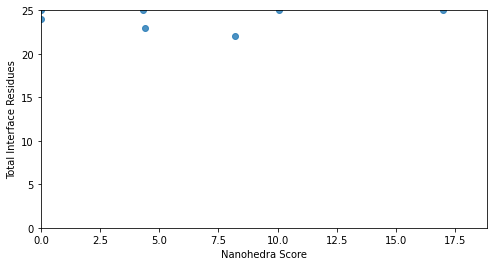

0.8814005390459307

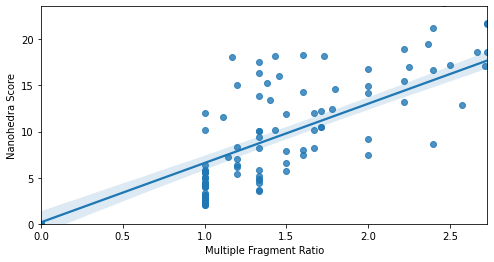

KeyError: 'interface_area'

In [59]:
data_pairs = [('nanohedra_score', 'total_interface_residues'), # ('nanohedra_score_central', 'nanohedra_score'), <-- 0.97 correlation
              # ('nanohedra_score_central', 'interface_area'), # ('nanohedra_score', 'interface_area'),
              ('multiple_fragment_ratio', 'nanohedra_score'), # ('nanohedra_score', 'number_fragment_residues_central'),
              ('multiple_fragment_ratio', 'interface_area')]
# for x, y in data_pairs:
#     ax = sns.displot(data=plot_df, x=x, y=y, palette='colorblind', kind='kde', rug=True, linewidth = 3)  # hue='protocol', legend=False, kde=True, multiple="stack")
#     ax.set(xlabel=' '.join(x.split('_')).title(), ylabel=' '.join(y.split('_')).title())
# ay = sns.displot(data=df, x='Predicted Binding Energy', hue='protocol', palette='colorblind', kind='kde', linewidth = 3)  # kde=True, multiple="stack")
# ay.set(ylabel='Frequency')

for x, y in data_pairs:
    display(plot_df[x].corr(plot_df[y]))
    f, axs = plt.subplots(1, 1, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4]))
    y_values = plot_df[y].values
    x_values = plot_df[x].values
    ax = sns.regplot(x=x, y=y, data=plot_df, ax=axs) 
    ax.set_ylim(0, np.max(y_values)*0.5)  # showfliers=False)
    ax.set_xlim(0, np.max(x_values)*0.4)
#     if y == 'int_energy_res_summary_delta':
#         y = 'predicted_binding_energy'
#     if x == 'protocol_energy_distance_sum':
#         x = 'protocol_distance'
    ax.set(xlabel=' '.join(x.split('_')).title(), ylabel=' '.join(y.split('_')).title())
#     f.add_subplot(ax)
    plt.show()

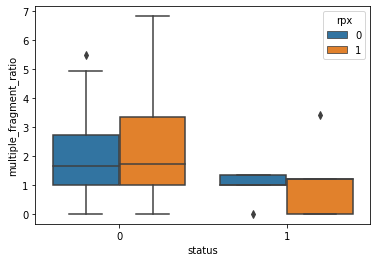

In [69]:
ax = sns.boxplot(x="status", y="multiple_fragment_ratio", hue="rpx", data=plot_df)  

In [428]:
metrics_of_interest = {'interface_area_total': 'Buried Surface Area (BSA)',
                       'percent_interface_area_hydrophobic': '% Hydrophobic BSA',
                       'interface_energy': 'Predicted Binding Energy (ΔΔG)',
                       'interface_energy_density': 'Predicted Binding Energy Density (ΔΔG/A^2)',
                       'interface_bound_activation_energy': 'Predicted Activation Energy (ΔΔG‡)',
                       'solvation_energy': 'Solvation Energy (-ΔΔGsolv)',
#                        'solvation_energy_activation': 'Solvation Activation Energy (-ΔΔG‡solv)',
#                        'contact_count': 'Carbon-Carbon Contacts', 
                       'number_hbonds': 'H-bonds',
                       'shape_complementarity': 'Shape Complementarity',
                       'interface_composition_similarity': 'Interface Composition Similarity',
                       'interface_local_density': 'Interface Atomic Density',
#                        'interface_area_to_residue_surface_ratio': 'Interface BSA:SASA',
#                        'buried_unsatisfied_hbond_density': 'Buried Unsat. H-bond Density',
#                        'number_of_mutations': 'Residues Mutated',
#                        'percent_mutations': '% of Residues Mutated',
                       'nanohedra_score_center': 'Nanohedra Score',
#                        'percent_residues_fragment_center': '% TERM Residues',
#                        '': '',
                       'rmsd_complex': 'Design RMSD',
#                        'percent_core': '% Core Residues',
#                        'percent_rim': '% Rim Residues',
                       'entity_thermophilicity': '% Thermophilic Components'
#                        'observed_evolution': '% Residues Obs. Evolution',
                      }
metrics1 = {'interface_area_total': 'Buried Surface Area (BSA)',
            'percent_interface_area_hydrophobic': '% Hydrophobic BSA',
            'interface_energy': 'Predicted Binding Energy (ΔΔG)',
            'interface_energy_density': 'Predicted Binding Energy Density (ΔΔG/A^2)',
            'interface_bound_activation_energy': 'Predicted Activation Energy (ΔΔG‡)',
            'solvation_energy': 'Solvation Energy (-ΔΔGsolv)'}
metrics2 = {'number_hbonds': 'H-bonds',
            'shape_complementarity': 'Shape Complementarity',
            'interface_composition_similarity': 'Interface Composition Similarity',
            'interface_local_density': 'Interface Atomic Density',
#            'interface_area_to_residue_surface_ratio': 'Interface BSA:SASA',
#            'buried_unsatisfied_hbond_density': 'Buried Unsat. H-bond Density',
#            'number_of_mutations': 'Residues Mutated',
#            'percent_mutations': '% of Residues Mutated',
            'nanohedra_score_center': 'Nanohedra Score',
#            'percent_residues_fragment_center': '% TERM Residues',
#            '': '',
            'rmsd_complex': 'Design RMSD',
#            'percent_core': '% Core Residues',
#            'percent_rim': '% Rim Residues',
            'entity_thermophilicity': '% Thermophilic Components'}

In [315]:
# pvalue_df = pd.DataFrame()
select_df = clean_na_df.loc[:, metrics_of_interest.keys()]
clean_df_index = set(clean_na_df.index)
# difference_s = (clean_na_df.loc[clean_df_index.intersection(success_index), metrics_of_interest.keys()].mean())\
#     .sub(clean_na_df.loc[clean_df_index.difference(success_index), metrics_of_interest.keys()].mean())
difference_s = (clean_na_df.loc[idx_slice[:, :, :, 1], metrics_of_interest.keys()].mean())\
    .sub(clean_na_df.loc[idx_slice[:, :, :, 0], metrics_of_interest.keys()].mean())
pvalue_s = df_permutation_test(select_df, difference_s, compare='mean', group1_size=len(success_index))
# pvalue_df = pvalue_df.T  # transpose significance pairs to indices and significance metrics to columns

In [316]:
select_df

interface_area_total  \
rpx                    publication status                         
0   E1                 Meador      0                1578.444282   
    E10                Meador      0                1266.333133   
    E11                Meador      0                1442.113946   
    E12                Meador      0                2451.999701   
    E2                 Meador      0                1336.901356   
...                                                         ...   
    T33_Designs-T33-28 King        1                 629.685449   
    T33_Designs-T33-29 King        0                 808.470904   
    T33_Designs-T33-30 King        0                 692.908303   
    T33_Designs-T33-51 King        1                 563.809408   
    T33_Designs-T33-53 King        1                 623.830723   

                                           percent_interface_area_hydrophobic  \
rpx                    publication status                                       
0   E1                 Meador      0                                 0.602040   
    E10                Meador      0                                 0.598490   
    E11                Meador      0                                 0.579115   
    E12                Meador      0                                 0.617890   
    E2                 Meador      0                                 0.644843   
...                                                                       ...   
    T33_Designs-T33-28 King        1                                 0.824068   
    T33_Designs-T33-29 King        0                                 0.844927   
    T33_Designs-T33-30 King        0                                 0.818811   
    T33_Designs-T33-51 King        1                                 0.710838   
    T33_Designs-T33-53 King        1                                 0.723191   

                                           shape_complementarity  \
rpx                    publication status                          
0   E1                 Meador      0                    0.748526   
    E10                Meador      0                    0.759461   
    E11                Meador      0                    0.731704   
    E12                Meador      0                    0.690368   
    E2                 Meador      0                    0.706912   
...                                                          ...   
    T33_Designs-T33-28 King        1                    0.660394   
    T33_Designs-T33-29 King        0                    0.709443   
    T33_Designs-T33-30 King        0                    0.664496   
    T33_Designs-T33-51 King        1                    0.673215   
    T33_Designs-T33-53 King        1                    0.731114   

                                           interface_energy  \
rpx                    publication status                     
0   E1                 Meador      0             -69.634222   
    E10                Meador      0             -44.478445   
    E11                Meador      0             -62.402187   
    E12                Meador      0             -68.594792   
    E2                 Meador      0             -53.648522   
...                                                     ...   
    T33_Designs-T33-28 King        1             -10.397988   
    T33_Designs-T33-29 King        0             -14.751232   
    T33_Designs-T33-30 King        0             -12.182312   
    T33_Designs-T33-51 King        1             -12.220578   
    T33_Designs-T33-53 King        1             -12.361798   

                                           interface_bound_activation_energy  \
rpx                    publication status                                      
0   E1                 Meador      0                               20.573798   
    E10                Meador      0                               17.032755   
    E11                Meador      0                               11.597076   
    E12     

In [317]:
display(pvalue_s)

interface_area_total                       0.935
percent_interface_area_hydrophobic         0.043
shape_complementarity                      0.294
interface_energy                           0.826
interface_bound_activation_energy          0.292
solvation_energy                           0.881
solvation_energy_activation                0.272
number_hbonds                              0.943
interface_composition_similarity           0.715
interface_local_density                    0.191
interface_area_to_residue_surface_ratio    0.029
buried_unsatisfied_hbond_density           0.205
nanohedra_score_center                     0.975
percent_residues_fragment_center           0.595
rmsd_complex                               0.439
entity_thermophilicity                     0.757
dtype: float64

In [321]:
df = clean_na_df

In [76]:
bar_df

Value  \
status Expression Plate ID                                                   
0      E1                  interface_area_total                1578.444282   
                           percent_interface_area_hydrophobic     0.602040   
                           shape_complementarity                  0.748526   
                           interface_energy                     -69.634222   
                           interface_bound_activation_energy     20.573798   
...                                                                    ...   
       H9                  percent_residues_fragment_center       0.073171   
                           rmsd_complex                           0.570797   
                           percent_core                           0.410256   
                           percent_rim                            0.307692   
                           observed_evolution                     0.992000   

                                                              Metric   Z-score  
status Expression Plate ID                                                      
0      E1                  interface_area_total                   E1  4.234302  
                           percent_interface_area_hydrophobic     E1 -0.229731  
                           shape_complementarity                  E1 -0.229316  
                           interface_energy                       E1 -0.428443  
                           interface_bound_activation_energy      E1 -0.173226  
...                                                              ...       ...  
       H9                  percent_residues_fragment_center       H9 -0.233762  
                           rmsd_complex                           H9 -0.232035  
                           percent_core                           H9 -0.232592  
                           percent_rim                            H9 -0.232948  
                           observed_evolution                     H9 -0.230573  

[920 rows x 3 columns]

In [261]:
bar_df

Value  \
rpx                    publication status                                                   
0   E1                 Meador      0      interface_area_total                1578.444282   
                                          percent_interface_area_hydrophobic     0.602040   
                                          shape_complementarity                  0.748526   
                                          interface_energy                     -69.634222   
                                          interface_bound_activation_energy     20.573798   
...                                                                                   ...   
    T33_Designs-T33-53 King        1      percent_residues_fragment_center       0.266667   
                                          rmsd_complex                           0.093287   
                                          percent_core                           0.200000   
                                          percent_rim                            0.300000   
                                          entity_thermophilicity                 1.000000   

                                                                                                          Metric  
rpx                    publication status                                                                         
0   E1                 Meador      0      interface_area_total                              interface_area_total  
                                          percent_interface_area_hydrophobic  percent_interface_area_hydrophobic  
                                          shape_complementarity                            shape_complementarity  
                                          interface_energy                                      interface_energy  
                                          interface_bound_activation_energy    interface_bound_activation_energy  
...                                                                                                          ...  
    T33_Designs-T33-53 King        1      percent_residues_fragment_center      percent_residues_fragment_center  
                                          rmsd_complex                                              rmsd_complex  
                                          percent_core                                              percent_core  
                                          percent_rim                                                percent_rim  
                                          entity_thermophilicity                          entity_thermophilicity  

[6220 rows x 2 columns]

In [255]:
normalize_df

Value
rpx                    publication status                                             
0   E1                 Meador      0      interface_area_total                4.705218
                                          percent_interface_area_hydrophobic -0.232912
                                          shape_complementarity              -0.232454
                                          interface_energy                   -0.452729
                                          interface_bound_activation_energy  -0.170407
...                                                                                ...
    T33_Designs-T33-53 King        1      percent_residues_fragment_center   -0.251020
                                          rmsd_complex                       -0.252144
                                          percent_core                       -0.251452
                                          percent_rim                        -0.250804
                                          entity_thermophilicity             -0.246269

[6220 rows x 1 columns]

In [429]:
bar_df = pd.DataFrame(df.loc[:, metrics_of_interest.keys()].stack()) # .stack())
# bar_df['Metric'] = bar_df.index.get_level_values(1)
# bar_df['Protocol'] = bar_df.index.get_level_values(2)
bar_df = bar_df.rename({0: 'Value'}, axis=1)
# First, normalize the data according to protocol groups
bar_df['Metric'] = bar_df.index.get_level_values(-1)

In [430]:
normalize_df = bar_df.groupby('Metric').transform(lambda x: (x - x.mean()) / x.std())
final_bar_df = bar_df
final_bar_df['Z-score'] = normalize_df.loc[idx_slice[:, :, :], ['Value']]
# final_bar_df.rename(index=metrics_of_interest)
final_bar_df

Value  \
rpx                    publication status                                                   
0   E1                 Meador      0      interface_area_total                1578.444282   
                                          percent_interface_area_hydrophobic     0.602040   
                                          interface_energy                     -69.634222   
                                          interface_energy_density              -0.044116   
                                          interface_bound_activation_energy     20.573798   
...                                                                                   ...   
    T33_Designs-T33-53 King        1      interface_composition_similarity       0.463501   
                                          interface_local_density               43.329114   
                                          nanohedra_score_center                 3.838505   
                                          rmsd_complex                           0.093287   
                                          entity_thermophilicity                 1.000000   

                                                                                                          Metric  \
rpx                    publication status                                                                          
0   E1                 Meador      0      interface_area_total                              interface_area_total   
                                          percent_interface_area_hydrophobic  percent_interface_area_hydrophobic   
                                          interface_energy                                      interface_energy   
                                          interface_energy_density                      interface_energy_density   
                                          interface_bound_activation_energy    interface_bound_activation_energy   
...                                                                                                          ...   
    T33_Designs-T33-53 King        1      interface_composition_similarity      interface_composition_similarity   
                                          interface_local_density                        interface_local_density   
                                          nanohedra_score_center                          nanohedra_score_center   
                                          rmsd_complex                                              rmsd_complex   
                                          entity_thermophilicity                          entity_thermophilicity   

                                                                               Z-score  
rpx                    publication status                                               
0   E1                 Meador      0      interface_area_total                1.282012  
                                          percent_interface_area_hydrophobic -1.635719  
                                          interface_energy                   -3.086010  
                                          interface_energy_density           -1.594929  
                                          interface_bound_activation_energy  -0.486316  
...                                                                                ...  
    T33_Designs-T33-53 King        1      interface_composition_similarity   -0.512146  
                                          interface_local_density            -0.709721  
                                          nanohedra_score_center             -0.146355  
                                          rmsd_complex                       -0.310789  
                                          entity_thermophilicity              3.295150  

[4043 rows x 3 columns]

In [244]:
def map_index_level(df, mapping=None, level=0):
    df.index = df.index.set_levels([[mapping.get(item, item) for item in names] if i == level else names
                                    for i, names in enumerate(df.index.levels)])
def map_column_level(df, mapping=None, level=0):
    df.columns = df.columns.set_levels([[mapping.get(item, item) for item in names] if i == level else names
                                        for i, names in enumerate(df.columns.levels)])

In [431]:
# convert each value to a formatted value provided in mapping
map_index_level(final_bar_df, mapping=metrics_of_interest, level=2)
# map_index_level(final_bar_df, mapping=protocols_of_interest, level=2)
final_bar_df['RPX'] = final_bar_df.index.get_level_values(0)
final_bar_df['Publication'] = final_bar_df.index.get_level_values(2)
# final_bar_df['Status'] = final_bar_df.index.get_level_values(3)
# final_bar_df['Metric'] = final_bar_df.index.get_level_values(4)

In [421]:
final_bar_df

Value  \
rpx                    publication status                                                   
0   E1                 Meador      0      interface_area_total                1578.444282   
                                          percent_interface_area_hydrophobic     0.602040   
                                          interface_energy                     -69.634222   
                                          interface_bound_activation_energy     20.573798   
                                          solvation_energy                     -50.555058   
...                                                                                   ...   
    T33_Designs-T33-53 King        1      interface_composition_similarity       0.463501   
                                          interface_local_density               43.329114   
                                          nanohedra_score_center                 3.838505   
                                          rmsd_complex                           0.093287   
                                          entity_thermophilicity                 1.000000   

                                                                                                          Metric  \
rpx                    publication status                                                                          
0   E1                 Meador      0      interface_area_total                              interface_area_total   
                                          percent_interface_area_hydrophobic  percent_interface_area_hydrophobic   
                                          interface_energy                                      interface_energy   
                                          interface_bound_activation_energy    interface_bound_activation_energy   
                                          solvation_energy                                      solvation_energy   
...                                                                                                          ...   
    T33_Designs-T33-53 King        1      interface_composition_similarity      interface_composition_similarity   
                                          interface_local_density                        interface_local_density   
                                          nanohedra_score_center                          nanohedra_score_center   
                                          rmsd_complex                                              rmsd_complex   
                                          entity_thermophilicity                          entity_thermophilicity   

                                                                               Z-score  \
rpx                    publication status                                                
0   E1                 Meador      0      interface_area_total                1.282012   
                                          percent_interface_area_hydrophobic -1.635719   
                                          interface_energy                   -3.086010   
                                          interface_bound_activation_energy  -0.486316   
                                          solvation_energy                   -2.595641   
...                                                                                ...   
    T33_Designs-T33-53 King        1      interface_composition_similarity   -0.512146   
                                          interface_local_density            -0.709721   
                                          nanohedra_score_center             -0.146355   
                                          rmsd_complex                       -0.310789   
                                          entity_thermophilicity              3.295150   

                                                                              RPX  \
rpx                    publication status                                           
0   E1                 M

In [432]:
plot_bar_df = final_bar_df.droplevel(0, axis=0).droplevel(1, axis=0) # .droplevel(1, axis=0)
plot_bar_df.rename(index=metrics_of_interest, inplace=True)
plot_bar_df.rename(index={0: 'Failure', 1: 'Success'}, inplace=True)
plot_bar_df['Metric'] = plot_bar_df.index.get_level_values(2)
plot_bar_df['Status'] = plot_bar_df.index.get_level_values(1)
plot_bar_df = plot_bar_df.droplevel(1, axis=0).droplevel(1, axis=0)
# plot_bar_df['Metric'] = plot_bar_df.index.get_level_values(0)

In [433]:
plot_bar_df

,Value,Metric,Z-score,RPX,Publication,Status
E1,1578.444282,Buried Surface Area (BSA),1.282012,0,Meador,Failure
E1,0.602040,% Hydrophobic BSA,-1.635719,0,Meador,Failure
E1,-69.634222,Predicted Binding Energy (ΔΔG),-3.086010,0,Meador,Failure
E1,-0.044116,Predicted Binding Energy Density (ΔΔG/A^2),-1.594929,0,Meador,Failure
E1,20.573798,Predicted Activation Energy (ΔΔG‡),-0.486316,0,Meador,Failure
...,...,...,...,...,...,...
T33_Designs-T33-53,0.463501,Interface Composition Similarity,-0.512146,0,King,Success
T33_Designs-T33-53,43.329114,Interface Atomic Density,-0.709721,0,King,Success
T33_Designs-T33-53,3.838505,Nanohedra Score,-0.146355,0,King,Success
T33_Designs-T33-53,0.093287,Design RMSD,-0.310789,0,King,Success


In [383]:
plot_bar_df[plot_bar_df['Publication'] == 'Meador']

,Value,Metric,Z-score,RPX,Publication,Status
E1,1578.444282,Buried Surface Area (BSA),1.282012,0,Meador,Failure
E1,0.602040,% Hydrophobic BSA,-1.635719,0,Meador,Failure
E1,-69.634222,Predicted Binding Energy (ΔΔG),-3.086010,0,Meador,Failure
E1,20.573798,Predicted Activation Energy (ΔΔG‡),-0.486316,0,Meador,Failure
E1,-50.555058,Solvation Energy (-ΔΔGsolv),-2.595641,0,Meador,Failure
...,...,...,...,...,...,...
H9,0.762536,Interface Composition Similarity,1.256510,0,Meador,Failure
H9,57.890052,Interface Atomic Density,0.365319,0,Meador,Failure
H9,0.895253,Nanohedra Score,-1.052242,0,Meador,Failure
H9,0.570797,Design RMSD,0.725306,0,Meador,Failure


In [434]:
plot_meador_df = plot_bar_df[plot_bar_df['Publication'] == 'Meador']
plot_meador_fail_df = plot_meador_df[plot_meador_df['Status'] == 'Failure']
plot_success_df = plot_bar_df[plot_bar_df['Status'] == 'Success']
meador_v_success_plot_df = pd.concat([plot_meador_fail_df, plot_success_df])

In [382]:
meador_v_success_plot_df

,Value,Metric,Z-score,RPX,Publication,Status
E1,1578.444282,Buried Surface Area (BSA),1.282012,0,Meador,Failure
E1,0.602040,% Hydrophobic BSA,-1.635719,0,Meador,Failure
E1,-69.634222,Predicted Binding Energy (ΔΔG),-3.086010,0,Meador,Failure
E1,20.573798,Predicted Activation Energy (ΔΔG‡),-0.486316,0,Meador,Failure
E1,-50.555058,Solvation Energy (-ΔΔGsolv),-2.595641,0,Meador,Failure
...,...,...,...,...,...,...
T33_Designs-T33-53,0.463501,Interface Composition Similarity,-0.512146,0,King,Success
T33_Designs-T33-53,43.329114,Interface Atomic Density,-0.709721,0,King,Success
T33_Designs-T33-53,3.838505,Nanohedra Score,-0.146355,0,King,Success
T33_Designs-T33-53,0.093287,Design RMSD,-0.310789,0,King,Success


In [435]:
meador_success_plot_df = meador_v_success_plot_df.loc['F3', :]

In [436]:
meador_success_plot_df['Status'] = 'F3'

/tmp/ipykernel_3013190/3992157584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meador_success_plot_df['Status'] = 'F3'


With bad thermophilic values

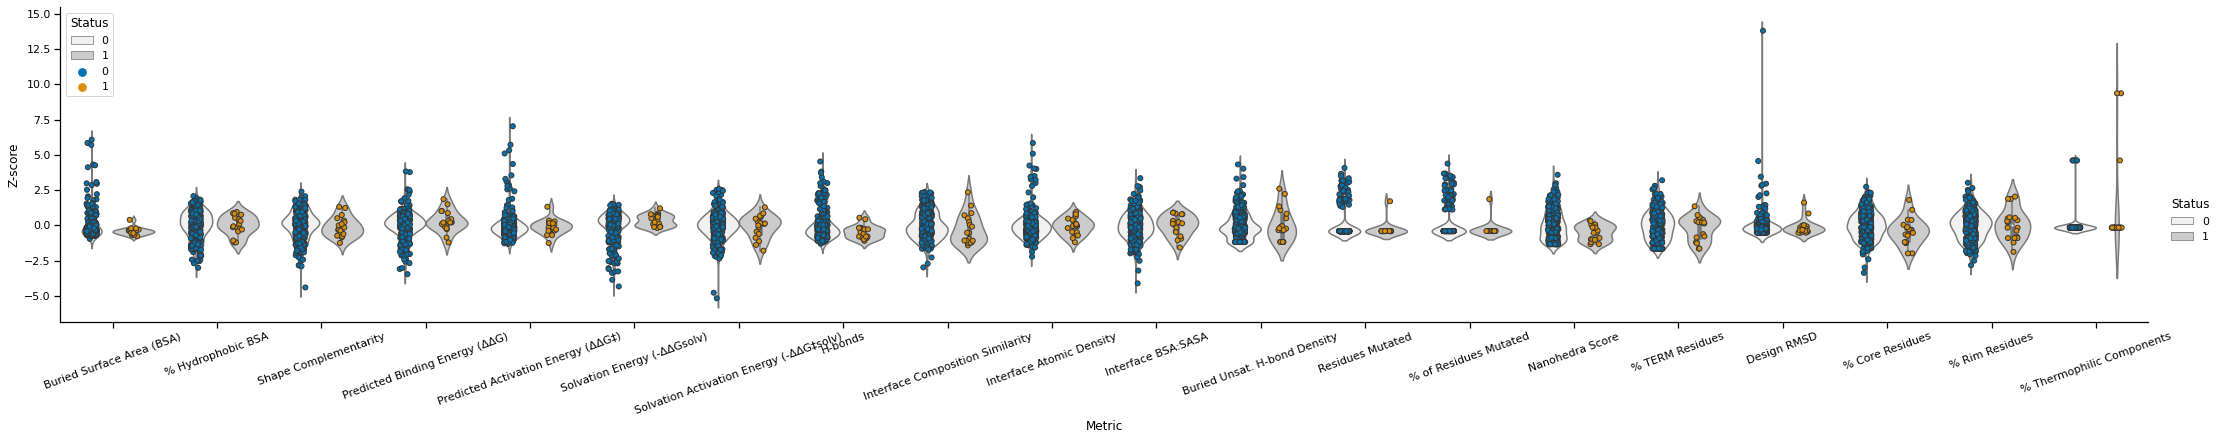

In [279]:
with sns.plotting_context("notebook", font_scale=1):
#     fig, ax = plt.subplots()
    sns.catplot(x='Metric', hue='Status', y='Z-score', data=plot_bar_df, 
                showfliers = False, color=".8",  # palette=sns.color_palette('colorblind'),
                order=metrics_of_interest.values(), height=5, aspect=6, kind='violin')  # split=True
    sns.stripplot(x='Metric', hue='Status', y='Z-score', data=plot_bar_df, 
                  palette=sns.color_palette('colorblind'), dodge=True, linewidth=1,  # showfliers = False,
                  order=metrics_of_interest.values())
    plt.xticks(rotation=20)
#     sns.boxplot(x='Metric', hue='Status', y='Z-score', data=final_bar_df, 
#                 showfliers = False, palette=sns.color_palette('colorblind'),
#                 order=metrics_of_interest.values())
# #     ax.set_ylabel('')    
#     ax.set_xlabel('')
#     ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
#     plt.show()

In [446]:
sig_df = final_bar_df.unstack().loc[idx_slice[:, :, :, :], idx_slice['Value', :]].droplevel(0, axis=1)
meador_fail_sig_df = sig_df.loc[idx_slice[:, :, 'Meador', 0], :]
# plot_meador_fail_df = plot_meador_df[plot_meador_df['Status'] == 'Failure']
success_sig_df = sig_df.loc[idx_slice[:, :, :, 1], :]
meador_v_success_sig_df = pd.concat([meador_fail_sig_df, success_sig_df])

In [451]:
# pvalue_df = pd.DataFrame()
select_df = meador_v_success_sig_df.loc[:, metrics_of_interest.keys()]
clean_df_index = set(meador_v_success_sig_df.index)
# difference_s = (clean_na_df.loc[clean_df_index.intersection(success_index), metrics_of_interest.keys()].mean())\
#     .sub(clean_na_df.loc[clean_df_index.difference(success_index), metrics_of_interest.keys()].mean())
difference_s = (select_df.loc[idx_slice[:, :, :, 1], metrics_of_interest.keys()].mean())\
    .sub(select_df.loc[idx_slice[:, :, :, 0], metrics_of_interest.keys()].mean())
meador_v_success_pvalue_s = df_permutation_test(select_df, difference_s, compare='mean', group1_size=len(clean_df_index))
# pvalue_df = pvalue_df.T  # transpose significance pairs to indices and significance metrics to columns

In [455]:
# meador_v_success_sig_df
meador_v_success_pvalue_s
# difference_s
select_df


interface_area_total  \
rpx                    publication status                         
0   E1                 Meador      0                1578.444282   
    E10                Meador      0                1266.333133   
    E11                Meador      0                1442.113946   
    E12                Meador      0                2451.999701   
    E2                 Meador      0                1336.901356   
...                                                         ...   
1   I32_Designs-I32-19 Bale        1                 539.482071   
    I32_Designs-I32-28 Bale        1                 666.169859   
    I52_Designs-I52-03 Bale        1                 507.517529   
    I52_Designs-I52-32 Bale        1                 639.932037   
    I52_Designs-I52-33 Bale        1                 711.128345   

                                           percent_interface_area_hydrophobic  \
rpx                    publication status                                       
0   E1                 Meador      0                                 0.602040   
    E10                Meador      0                                 0.598490   
    E11                Meador      0                                 0.579115   
    E12                Meador      0                                 0.617890   
    E2                 Meador      0                                 0.644843   
...                                                                       ...   
1   I32_Designs-I32-19 Bale        1                                 0.797679   
    I32_Designs-I32-28 Bale        1                                 0.756209   
    I52_Designs-I52-03 Bale        1                                 0.826587   
    I52_Designs-I52-32 Bale        1                                 0.737542   
    I52_Designs-I52-33 Bale        1                                 0.743643   

                                           interface_energy  \
rpx                    publication status                     
0   E1                 Meador      0             -69.634222   
    E10                Meador      0             -44.478445   
    E11                Meador      0             -62.402187   
    E12                Meador      0             -68.594792   
    E2                 Meador      0             -53.648522   
...                                                     ...   
1   I32_Designs-I32-19 Bale        1             -20.514472   
    I32_Designs-I32-28 Bale        1              10.217129   
    I52_Designs-I52-03 Bale        1               2.044041   
    I52_Designs-I52-32 Bale        1             -11.887291   
    I52_Designs-I52-33 Bale        1             -17.211735   

                                           interface_energy_density  \
rpx                    publication status                             
0   E1                 Meador      0                      -0.044116   
    E10                Meador      0                      -0.035124   
    E11                Meador      0                      -0.043271   
    E12                Meador      0                      -0.027975   
    E2                 Meador      0                      -0.040129   
...                                                             ...   
1   I32_Designs-I32-19 Bale        1                      -0.038026   
    I32_Designs-I32-28 Bale        1                       0.015337   
    I52_Designs-I52-03 Bale        1                       0.004028   
    I52_Designs-I52-32 Bale        1                      -0.018576   
    I52_Designs-I52-33 Bale        1                      -0.024203   

                                           interface_bound_activation_energy  \
rpx                    publication status                                      
0   E1                 Meador      0                               20.573798   
    E10                Meador      0                               17.032755   
    E11                Meador      0                 

## With updated thermophilic values

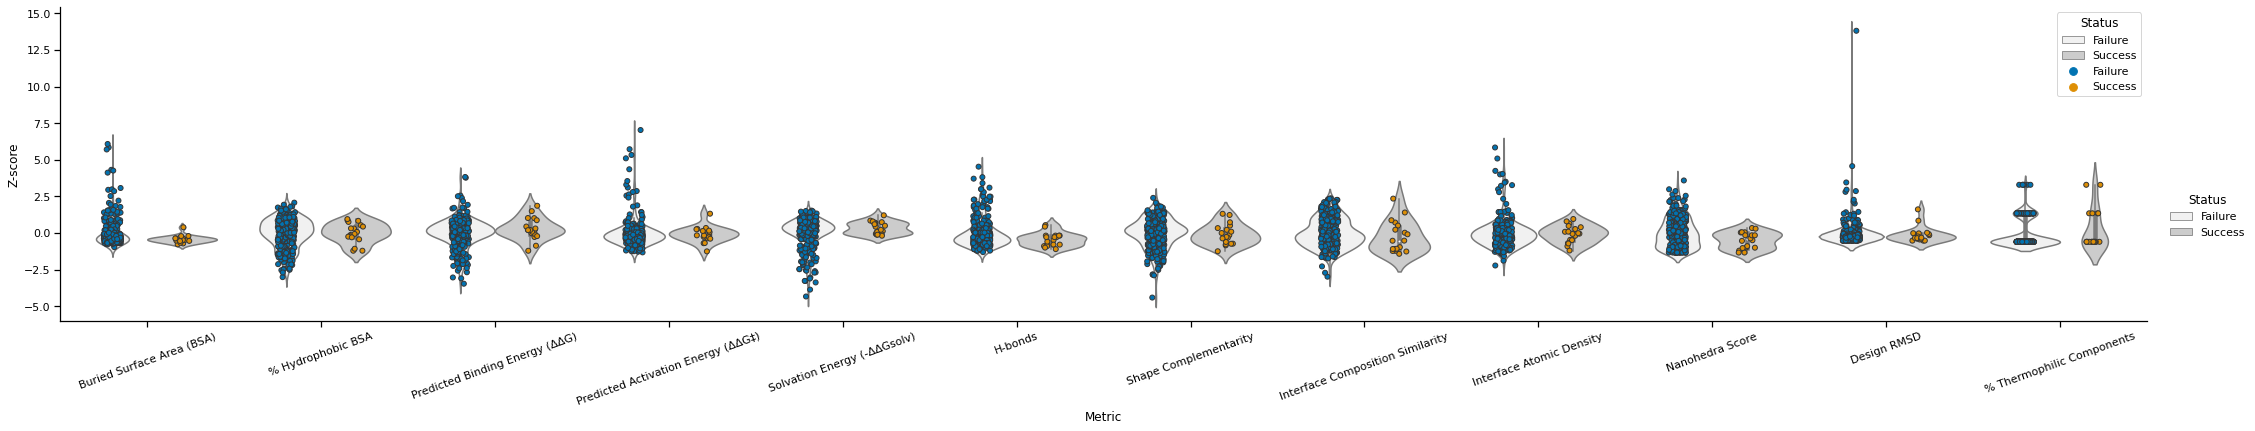

In [386]:
with sns.plotting_context("notebook", font_scale=1):
#     fig, ax = plt.subplots()
    sns.catplot(x='Metric', hue='Status', y='Z-score', data=plot_bar_df, 
                showfliers = False, color=".8",  # palette=sns.color_palette('colorblind'),
                order=metrics_of_interest.values(), height=5, aspect=6, kind='violin')  # split=True
    sns.stripplot(x='Metric', hue='Status', y='Z-score', data=plot_bar_df, 
                  palette=sns.color_palette('colorblind'), dodge=True, linewidth=1,  # showfliers = False,
                  order=metrics_of_interest.values())
    plt.xticks(rotation=20)
#     sns.boxplot(x='Metric', hue='Status', y='Z-score', data=final_bar_df, 
#                 showfliers = False, palette=sns.color_palette('colorblind'),
#                 order=metrics_of_interest.values())
# #     ax.set_ylabel('')    
#     ax.set_xlabel('')
#     ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
#     plt.show()

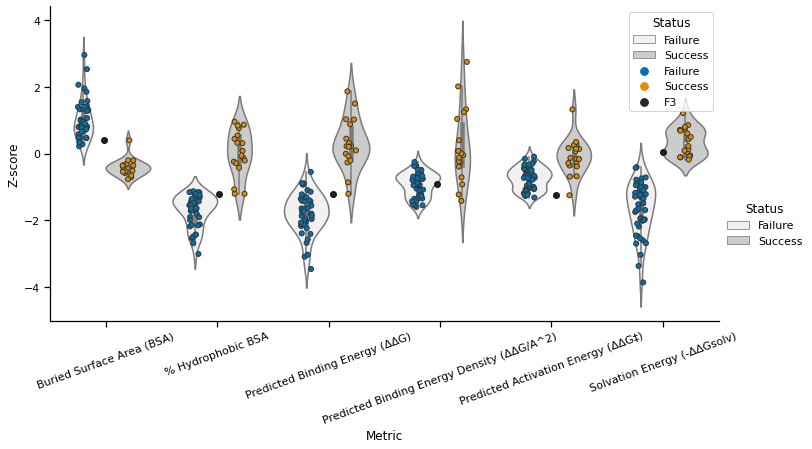

In [437]:
with sns.plotting_context("notebook", font_scale=1):
#     fig, ax = plt.subplots()
    sns.catplot(x='Metric', hue='Status', y='Z-score', data=meador_v_success_plot_df, 
                showfliers = False, color=".8",  # palette=sns.color_palette('colorblind'),
                order=metrics1.values(), height=5, aspect=2, kind='violin')  # split=True
    sns.stripplot(x='Metric', hue='Status', y='Z-score', data=meador_v_success_plot_df, 
                  palette=sns.color_palette('colorblind'), dodge=True, linewidth=1,  # showfliers = False,
                  order=metrics1.values())
    sns.stripplot(x='Metric', hue='Status', y='Z-score', data=meador_success_plot_df, 
                  color='purple', linewidth=2,  # showfliers = False,
                  dodge=True, jitter=0.05,
                  order=metrics1.values())
    plt.xticks(rotation=20)
#     sns.boxplot(x='Metric', hue='Status', y='Z-score', data=final_bar_df, 
#                 showfliers = False, palette=sns.color_palette('colorblind'),
#                 order=metrics_of_interest.values())
# #     ax.set_ylabel('')    
#     ax.set_xlabel('')
#     ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
#     plt.show()

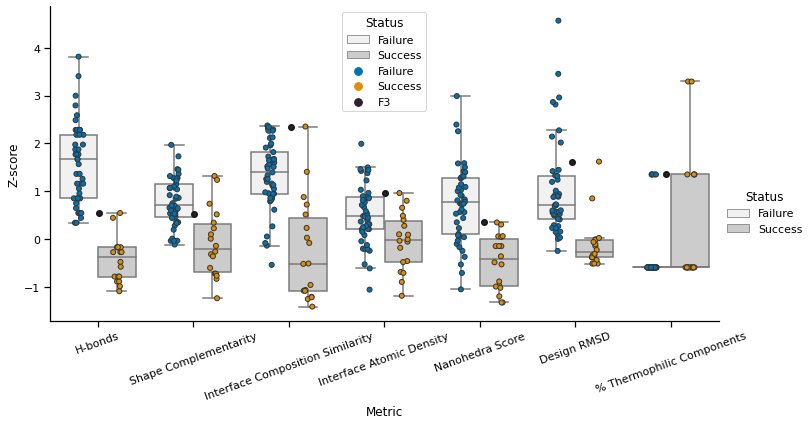

In [438]:
with sns.plotting_context("notebook", font_scale=1):
#     fig, ax = plt.subplots()
    sns.catplot(x='Metric', hue='Status', y='Z-score', data=meador_v_success_plot_df, 
                showfliers = False, color=".8", # palette=sns.color_palette('colorblind'),
                order=metrics2.values(), height=5, aspect=2, kind='box')  # split=True
    sns.stripplot(x='Metric', hue='Status', y='Z-score', data=meador_v_success_plot_df, 
                  palette=sns.color_palette('colorblind'), dodge=True, linewidth=1,  # showfliers = False,
                  order=metrics2.values())
    sns.stripplot(x='Metric', hue='Status', y='Z-score', data=meador_success_plot_df, 
                  color='purple', linewidth=2, # showfliers = False,
                  dodge=True, jitter=0.05,
                  order=metrics2.values())
    plt.xticks(rotation=20)
#     sns.boxplot(x='Metric', hue='Status', y='Z-score', data=final_bar_df, 
#                 showfliers = False, palette=sns.color_palette('colorblind'),
#                 order=metrics_of_interest.values())
# #     ax.set_ylabel('')    
#     ax.set_xlabel('')
#     ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
#     plt.show()

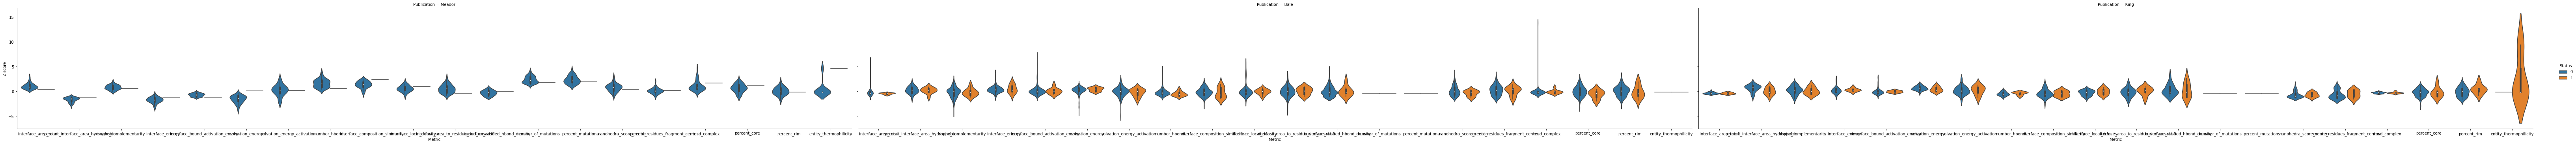

In [273]:
sns.catplot(x="Metric",hue='Status', y='Z-score', data=plot_bar_df, col="Publication",  # col="Protocol",  #
            kind="violin", height=5, aspect=6)